In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.losses import KLDivergence, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

from tensorflow.keras.losses import categorical_crossentropy

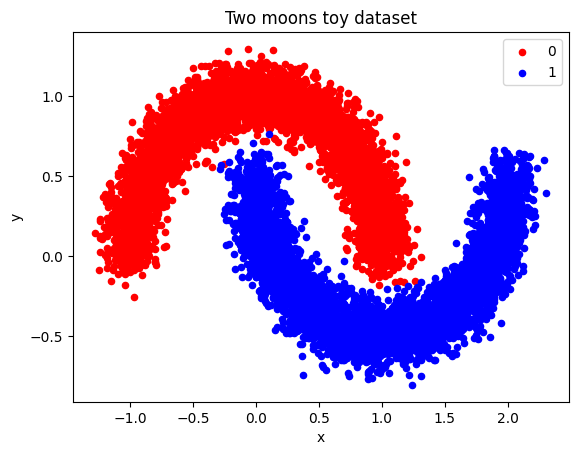

In [2]:

# generate 2d classification dataset
X, y = make_moons(n_samples=10000, noise=0.1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.title('Two moons toy dataset')
pyplot.show()

In [3]:
# Function to select a specified number of samples for each category
def select_samples(x, y, num_samples):
    selected_samples = []
    selected_labels = []
    for i in range(2):
        indices = np.where(y == i)[0][:num_samples]
        selected_samples.append(x[indices])
        selected_labels.append(y[indices])
    selected_samples = np.concatenate(selected_samples, axis=0)
    selected_labels = np.concatenate(selected_labels, axis=0)
    return selected_samples, selected_labels

x_subset, y_subset = select_samples(X, y, 5000)
print('Shape of input', x_subset.shape)
print('Shape of output',y_subset.shape)


# Display one random image from x_train_subset
index = np.random.randint(0, len(x_subset))
image = x_subset[index]

# Verifying count of data
# sum_of_class_0 = 0
# sum_of_class_1 = 0
# for i in range(len(y_subset)):
#   if y_subset[i] == 0:
#     sum_of_class_0 = sum_of_class_0 + 1
#   else:
#     sum_of_class_1 = sum_of_class_1+ 1
# print(sum_of_class_0, 'afdkajfdk',sum_of_class_1)

Shape of input (10000, 2)
Shape of output (10000,)


In [4]:
np.random.seed(0)
labeled_mask = np.zeros(10000, dtype=bool)
for i in range(2):
    indices = np.where(np.array(y_subset) == i)[0] # returns shuffled array of indices of each class, total 1000 data.
    np.random.shuffle(indices)
    labeled_mask[indices[:3]] = True

labeled_dataset_to_be_trained_index = np.where(labeled_mask)[0]
unlabeled_dataset_index = np.where(~labeled_mask)[0]



labeled_dataset_to_be_trained_x = np.array([x_subset[index]  for index in labeled_dataset_to_be_trained_index])
labeled_dataset_to_be_trained_y = np.array([y_subset[index]  for index in labeled_dataset_to_be_trained_index])

unlabeled_dataset_x = np.array([x_subset[index]  for index in unlabeled_dataset_index])
# unlabeled_dataset_y = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(len(labeled_dataset_to_be_trained_y), '3 labeled example from each category so total 6 only labeled')
print('Data that is used for training is:', labeled_dataset_to_be_trained_x, 'corresponding labels are:',labeled_dataset_to_be_trained_y)


unique_labels = np.unique([y for y in labeled_dataset_to_be_trained_y])

# Split the subset into training and testing sets: since labeled training set only has 3 labeled for each category.
labeled_x_train_subset,labeled_x_val_subset, labeled_y_train_subset, labeled_y_val_subset = train_test_split(
    labeled_dataset_to_be_trained_x, labeled_dataset_to_be_trained_y, test_size=0.1, random_state=42
)


train_labels_y = keras.utils.to_categorical(labeled_y_train_subset, num_classes=2)
test_labels_y = keras.utils.to_categorical(labeled_y_val_subset, num_classes=2)

print("One hot encoded vector for training data after splitting", train_labels_y)


6 3 labeled example from each category so total 6 only labeled
Data that is used for training is: [[-0.02489784  1.12706489]
 [ 0.91209964  0.47217153]
 [ 1.09969385  0.43259046]
 [ 0.52351001 -0.44278435]
 [ 1.82381091  0.08892143]
 [ 0.08552259 -0.18489678]] corresponding labels are: [0 0 0 1 1 1]
One hot encoded vector for training data after splitting [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [5]:
# For 6 data training accuracy was 0 so used augumentation technique.
def augment_data(points,labels, num_augmented_samples=10):
    augmented_data = []
    augmented_labels = []

    for _ in range(num_augmented_samples):
        # Apply random transformations
        augmented_points = apply_random_transformations(points)

        # Append augmented data to the list
        augmented_data.append(augmented_points)
        augmented_labels.append(labels)

    return augmented_data, augmented_labels

def apply_random_transformations(points):
    # Define your random transformations here
    # For example, you can add random noise or random scaling

    # Random scaling
    scale_factor = np.random.uniform(0.8, 1.2)
    scaled_points = points * scale_factor

    # Random noise
    noise = np.random.normal(0, 0.1, points.shape)
    noisy_points = scaled_points + noise

    return noisy_points


augmented_data, augmented_labels= augment_data(labeled_x_train_subset,labeled_y_train_subset, num_augmented_samples=20)
# print(np.array(augmented_data).shape)

train_data_aug_x = np.array(augmented_data).reshape((100, 2))
train_data_aug_y = np.array(augmented_labels).reshape((100,))



# Split the subset into training and testing sets: since labeled training set only has 3 labeled for each category.
labeled_x_train_subset_aug,labeled_x_val_subset_aug, labeled_y_train_subset_aug, labeled_y_val_subset_aug = train_test_split(
    train_data_aug_x, train_data_aug_y, test_size=0.1, random_state=42
)


train_labels_y_aug = keras.utils.to_categorical(labeled_y_train_subset_aug, num_classes=2)
test_labels_y_yug = keras.utils.to_categorical(labeled_y_val_subset_aug, num_classes=2)

print("One hot encoded vector for training data after splitting shape is:", train_labels_y_aug.shape)

# print(np.array(augmented_data), 'Augmented data')
# print(np.array(augmented_data).reshape((25, 2)))
# print(np.array(augmented_labels).reshape(25,), 'Corresponding labels for augmented data')


One hot encoded vector for training data after splitting shape is: (90, 2)


In [7]:
# Build the neural network model and train with 6 labeled data points
model = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Input have only 2 features
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 10 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')

])

# Compile the model
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])



# Train the model
# model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=64,  validation_data=(labeled_x_val_subset, test_labels_y))
# Training model with only 6 labelled data
model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=2)

train_loss, train_accuracy = model.evaluate(labeled_x_train_subset, train_labels_y)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(labeled_x_val_subset, test_labels_y)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the model on the unlabeled dataset and
test_loss_ul, test_acc_ul = model.evaluate(unlabeled_dataset_x)
print('\nTest accuracy for unlabeled data set:', test_acc_ul)

Epoch 1/20
3/3 [==============================] - 1s 7ms/step - loss: 0.7215 - accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7198 - accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7172 - accuracy: 0.4000
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 0.7155 - accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7152 - accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7120 - accuracy: 0.4000
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.4000
Epoch 8/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7095 - accuracy: 0.4000
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 0.7082 - accuracy: 0.4000
Epoch 10/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7072 - accuracy: 0.4000
Epoch 11/20
3/3 [======================

In [8]:
# Build the neural network model and train with augmented data points
model = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Input have only 2 features
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 10 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')

])

# Compile the model
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])



# Train the model
# model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=64,  validation_data=(labeled_x_val_subset, test_labels_y))
# Training model with only 6 labelled data
model.fit(labeled_x_train_subset_aug, train_labels_y_aug , epochs=20, batch_size=2)

train_loss, train_accuracy = model.evaluate(labeled_x_train_subset_aug, train_labels_y_aug)
print(f'Train Accuracy: {train_accuracy:.4f}')
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_val_subset_aug,test_labels_y_yug)
print('\nTest accuracy:', test_acc)

# Evaluate the model on the unlabeled dataset and
test_loss_ul, test_acc_ul = model.evaluate(unlabeled_dataset_x)
print('\nTest accuracy for unlabeled data set:', test_acc_ul)

Epoch 1/20
45/45 [==============================] - 2s 3ms/step - loss: 0.7427 - accuracy: 0.2556
Epoch 2/20
45/45 [==============================] - 0s 3ms/step - loss: 0.7121 - accuracy: 0.6000
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.6222
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.6222
Epoch 5/20
45/45 [==============================] - 0s 6ms/step - loss: 0.6663 - accuracy: 0.6222
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.6580 - accuracy: 0.6222
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6222
Epoch 8/20
45/45 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.6222
Epoch 9/20
45/45 [==============================] - 0s 7ms/step - loss: 0.6387 - accuracy: 0.6222
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.6317 - accuracy: 0.6222
Epoch 11/20
45/45 [

In [11]:
# Virtual Adversarial Training
x = labeled_x_train_subset

def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return d


r = tf.random.normal(shape=tf.shape(labeled_x_train_subset))
# r =  generate_random_unit_vector(r)
perturbed_input = labeled_x_train_subset+0.01*r

model_vat = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Assuming input images are 28x28
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')

])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_vat.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])


def virtual_adversarial_loss(x, logits):
    d = generate_random_unit_vector(x)

    with tf.GradientTape() as tape:
        tape.watch(x)
        logits_perturbed = model_vat(x + alpha * d)
        loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    r_vadv = tape.gradient(loss, x)
    r_vadv_normalized = alpha * r_vadv / tf.norm(r_vadv)

    logits_perturbed = model_vat(x + r_vadv_normalized)
    loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    return loss



epochs = 20
batch_size = 1

for epoch in range(epochs):
    for i in range(0, len(perturbed_input), batch_size):
        x_batch = perturbed_input[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_vat(x_batch)
            classification_loss = tf.keras.losses.categorical_crossentropy(y_batch, logits)
            vat_loss = virtual_adversarial_loss(x_batch, logits)
            total_loss = classification_loss + vat_loss
        gradients = tape.gradient(total_loss, model_vat.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_vat.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/40] Total Loss: {mean_total_loss:.4f}')



# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(labeled_x_train_subset, train_labels_y)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_vat.evaluate(labeled_x_val_subset, test_labels_y)
print("Test accuracy for VAT:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_vat.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_vat = np.array([y_subset[index]  for index in unlabeled_dataset_index])

# print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_vat.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_vat)
print("Accuracy on unlabeled dataset:", accuracy_unlabeled)



1/1 [==============================] - 0s 46ms/step - loss: 0.5787 - accuracy: 0.6000
Train Accuracy: 0.6000
1/1 [==============================] - 0s 387ms/step - loss: 0.4133 - accuracy: 1.0000
Test accuracy for VAT: 1.0
313/313 [==============================] - 1s 2ms/step
Accuracy on unlabeled dataset: 0.5


In [25]:
# Virtual Adversarial Training with augmented data points
x = labeled_x_train_subset_aug

def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return d


r = tf.random.normal(shape=tf.shape(labeled_x_train_subset_aug))
# r =  generate_random_unit_vector(r)
perturbed_input = labeled_x_train_subset_aug+0.01*r

model_vat = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Assuming input images are 28x28
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')

])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_vat.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])


def virtual_adversarial_loss(x, logits):
    d = generate_random_unit_vector(x)

    with tf.GradientTape() as tape:
        tape.watch(x)
        logits_perturbed = model_vat(x + alpha * d)
        loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    r_vadv = tape.gradient(loss, x)
    r_vadv_normalized = alpha * r_vadv / tf.norm(r_vadv)

    logits_perturbed = model_vat(x + r_vadv_normalized)
    loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    return loss



epochs = 20
batch_size = 1

for epoch in range(epochs):
    for i in range(0, len(perturbed_input), batch_size):
        x_batch = perturbed_input[i:i+batch_size]
        y_batch = train_labels_y_aug[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_vat(x_batch)
            classification_loss = tf.keras.losses.categorical_crossentropy(y_batch, logits)
            vat_loss = virtual_adversarial_loss(x_batch, logits)
            total_loss = classification_loss + vat_loss
        gradients = tape.gradient(total_loss, model_vat.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_vat.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/40] Total Loss: {mean_total_loss:.4f}')


# Evaluate the model on the train set
train_loss, train_accuracy = model_vat.evaluate(labeled_x_train_subset_aug, train_labels_y_aug)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_vat.evaluate(labeled_x_val_subset_aug, test_labels_y_yug)
print("Test accuracy for VAT:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_vat.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_vat = np.array([y_subset[index]  for index in unlabeled_dataset_index])

# print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_vat.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_vat)
print("Accuracy on unlabeled dataset:", accuracy_unlabeled)

3/3 [==============================] - 0s 7ms/step - loss: 6.5226 - accuracy: 0.6222
Train Accuracy: 0.6222
1/1 [==============================] - 0s 36ms/step - loss: 6.6775 - accuracy: 0.4000
Test accuracy for VAT: 0.4000000059604645
313/313 [==============================] - 1s 2ms/step
Accuracy on unlabeled dataset: 0.8054832899739844


In [16]:
# Entropy minimization
x = labeled_x_train_subset

model_entropy_minimization = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Assuming input images are 28x28
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')
])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_entropy_minimization.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])


def entropy_minimization_loss(y_true, y_pred, alpha=0.001):
    # Calculating the standard cross-entropy loss
    # print("INSIDE ENTROPY MINIMIZATION LOSS", y_true, y_pred)
    cross_entropy_loss = categorical_crossentropy(y_true, y_pred)
    # print(cross_entropy_loss.shape)


    # Calculating the entropy of the predicted probabilities
    epsilon = 1e-10
    entropy = tf.reduce_sum(-y_pred * tf.math.log(y_pred + epsilon), axis=1)
    # print('afdkafjk', entropy)

    # Combining the cross-entropy loss with the entropy regularization term
    total_loss = cross_entropy_loss + alpha * entropy

    # tf.debugging.check_numerics(cross_entropy_loss, "cross_entropy_loss is NaN or Inf")

    return total_loss




epochs = 20
batch_size = 1

for epoch in range(epochs):
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_entropy_minimization(x_batch)
            total_loss = entropy_minimization_loss(y_batch,logits )
        gradients = tape.gradient(total_loss, model_entropy_minimization.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_entropy_minimization.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')


# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(labeled_x_train_subset, train_labels_y)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_entropy_minimization.evaluate(labeled_x_val_subset, test_labels_y)
print("Test accuracy for Entropy minimization:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_entropy_minimization.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_entropy_minimization = np.array([y_subset[index]  for index in unlabeled_dataset_index])

accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_entropy_minimization)
print("Accuracy on unlabeled dataset for entropy minimization:", accuracy_unlabeled)



1/1 [==============================] - 0s 66ms/step - loss: 0.5787 - accuracy: 0.6000
Train Accuracy: 0.6000
1/1 [==============================] - 0s 458ms/step - loss: 0.8527 - accuracy: 0.0000e+00
Test accuracy for Entropy minimization: 0.0
313/313 [==============================] - 1s 2ms/step
Accuracy on unlabeled dataset for entropy minimization: 0.5


In [23]:
# Entropy minimization with augmented points
x = labeled_x_train_subset_aug

model_entropy_minimization = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Assuming input images are 28x28
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')
])

alpha = 0.001  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_entropy_minimization.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])


def entropy_minimization_loss(y_true, y_pred, alpha=0.001):
    # Calculating the standard cross-entropy loss
    # print("INSIDE ENTROPY MINIMIZATION LOSS", y_true, y_pred)
    cross_entropy_loss = categorical_crossentropy(y_true, y_pred)
    # print(cross_entropy_loss.shape)


    # Calculating the entropy of the predicted probabilities
    epsilon = 1e-10
    entropy = tf.reduce_sum(-y_pred * tf.math.log(y_pred + epsilon), axis=1)
    # print('afdkafjk', entropy)

    # Combining the cross-entropy loss with the entropy regularization term
    total_loss = cross_entropy_loss + alpha * entropy

    # tf.debugging.check_numerics(cross_entropy_loss, "cross_entropy_loss is NaN or Inf")

    return total_loss




epochs = 20
batch_size = 1

for epoch in range(epochs):
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = train_labels_y_aug[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_entropy_minimization(x_batch)
            total_loss = entropy_minimization_loss(y_batch,logits )
        gradients = tape.gradient(total_loss, model_entropy_minimization.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_entropy_minimization.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')


#Evaluate the model on the train set
train_loss, train_accuracy = model_entropy_minimization.evaluate(labeled_x_train_subset_aug, train_labels_y_aug)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_entropy_minimization.evaluate(labeled_x_val_subset_aug, test_labels_y_yug)
print("Test accuracy for Entropy minimization:", test_acc)
# Evaluate the model on the unlabeled data set, first use mode to predict the logit

unlabeled_predictions = model_entropy_minimization.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_entropy_minimization = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(unlabeled_predictions_exact.shape, 'shape', unlabeled_dataset_y_for_entropy_minimization.shape)
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_entropy_minimization)
print("Accuracy on unlabeled dataset for entropy minimization:", accuracy_unlabeled)



3/3 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.9444
Train Accuracy: 0.9444
1/1 [==============================] - 0s 25ms/step - loss: 0.6307 - accuracy: 0.9000
Test accuracy for Entropy minimization: 0.8999999761581421
313/313 [==============================] - 0s 1ms/step
(9994,) shape (9994,)
Accuracy on unlabeled dataset for entropy minimization: 0.8139883930358215


In [20]:
# pseudo labels:

model_pseudo = keras.Sequential([
    layers.Flatten(input_shape=(2,)),  # Input have only 2 features
    layers.Dense(10, activation='sigmoid'),   # Hidden layer with 10 neurons and ReLU activation
    layers.Dense(2, activation='sigmoid')

])
model_pseudo.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


pseudo_label_predictions = model_pseudo.predict(unlabeled_dataset_x)
max_predictions_value = np.argmax(pseudo_label_predictions)



train_labels_y_value = keras.utils.to_categorical(labeled_dataset_to_be_trained_y, num_classes=2)
#  combine labeled & unlabeled dataset:
new_train_x = np.vstack((labeled_dataset_to_be_trained_x, unlabeled_dataset_x))
new_train_y = np.vstack((train_labels_y_value, pseudo_label_predictions))




# train the model with this dataset
labeled_x_train_subset_pseudo,labeled_x_test_subset_pseudo, labeled_y_train_subset_pseudo, labeled_y_test_subset_pseudo = train_test_split(
    new_train_x, new_train_y, test_size=0.2, random_state=42
)

# train_labels_y_pseudo = keras.utils.to_categorical(labeled_y_train_subset_pseudo, num_classes=10)
# test_labels_y_pseudo = keras.utils.to_categorical(labeled_y_test_subset_pseudo, num_classes=10)

# Extract true labels for the labeled subset
train_labels_y_pseudo = labeled_y_train_subset_pseudo[:, :2]
test_labels_y_pseudo = labeled_y_test_subset_pseudo[:, :2]

# print(train_labels_y_pseudo.shape, test_labels_y_pseudo.shape, labeled_x_train_subset_pseudo.shape)
# Train the model
model_pseudo.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64)
# model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset_pseudo, test_labels_y_pseudo))

## Evaluate the model on the train set
train_loss, train_accuracy = model_pseudo.evaluate(labeled_x_train_subset_pseudo, train_labels_y_pseudo)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_pseudo.evaluate(labeled_x_test_subset_pseudo, test_labels_y_pseudo)
print('\nTest accuracy:', test_acc)

# Evaluate the model on the unlabeled data set, first use model to predict the logit
unlabeled_predictions = model_pseudo.predict(unlabeled_dataset_x)
unlabeled_predictions_exact = np.argmax(unlabeled_predictions, axis=1)
unlabeled_dataset_y_for_pseudo_labe = np.array([y_subset[index]  for index in unlabeled_dataset_index])
accuracy_unlabeled = np.mean(unlabeled_predictions_exact == unlabeled_dataset_y_for_pseudo_labe)
print("Accuracy on unlabeled dataset for pseudo labels:", accuracy_unlabeled)

313/313 [==============================] - 1s 2ms/step
Epoch 1/20
125/125 [==============================] - 1s 3ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 8/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 9/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.9998
Epoch 10/20
125/125 [========================

3691/3691 [==============================] - 6s 2ms/step


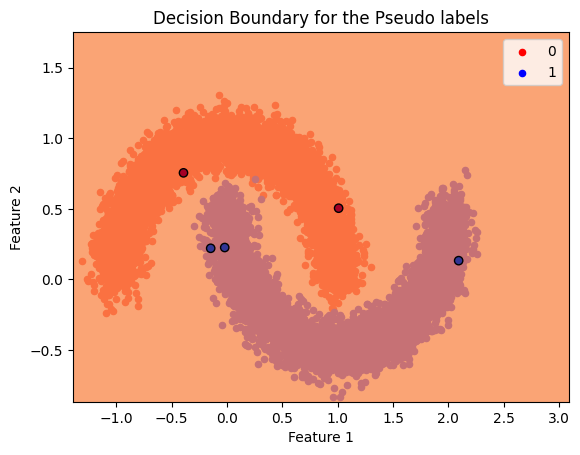

In [ ]:
# Generate mesh grid
x_min, x_max = labeled_x_train_subset[:, 0].min() - 1, labeled_x_train_subset[:, 0].max() + 1
y_min, y_max = labeled_x_train_subset[:, 1].min() - 1, labeled_x_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the mesh grid points for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Use the trained model to predict class labels for each point in the mesh grid
Z = model.predict(mesh_points)
Z = np.argmax(Z, axis=1)

colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])



# Reshape the predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Plot the contour plot with the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(labeled_x_train_subset[:, 0], labeled_x_train_subset[:, 1], c=np.argmax(train_labels_y, axis=1) , cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')

plt.title('Decision Boundary for the Pseudo labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

3691/3691 [==============================] - 7s 2ms/step


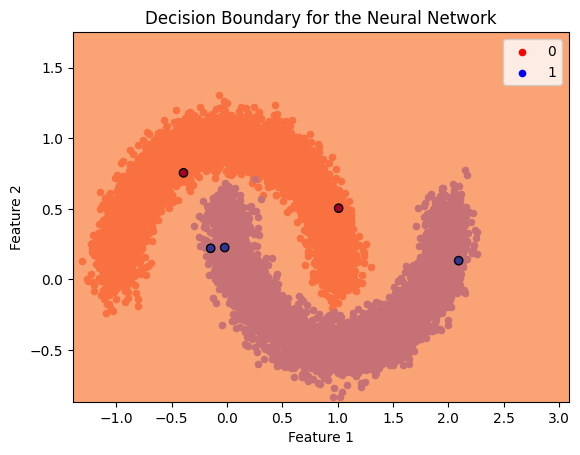

In [ ]:
# Generate mesh grid
x_min, x_max = labeled_x_train_subset[:, 0].min() - 1, labeled_x_train_subset[:, 0].max() + 1
y_min, y_max = labeled_x_train_subset[:, 1].min() - 1, labeled_x_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the mesh grid points for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Use the trained model to predict class labels for each point in the mesh grid
Z = model_vat.predict(mesh_points)
Z = np.argmax(Z, axis=1)

colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])



# Reshape the predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Plot the contour plot with the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

# Scatter plot of the training data points
plt.scatter(labeled_x_train_subset[:, 0], labeled_x_train_subset[:, 1], c=np.argmax(train_labels_y, axis=1) , cmap=plt.cm.RdYlBu, edgecolors='k', marker='o')

plt.title('Decision Boundary for the Neural Network')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()